# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.ensemble import RandomForestClassifier

In [3]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [4]:
df = pd.read_csv('diabetes.csv')
df['Sex'] = np.where(df['Gender']=='F',0,1)
df['Classification'] = np.where(df['CLASS']=='N',0,1)
df = df.drop(['ID', 'No_Pation', 'Gender', 'CLASS'], axis=1)
df.shape

(1000, 12)

---
# 3. independent variables

In [5]:
df.drop('Classification', axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AGE,1000.0,53.528000,8.799241,20.0,51.0,55.0,59.0,79.00
Urea,1000.0,5.124743,2.935165,0.5,3.7,4.6,5.7,38.90
Cr,1000.0,68.943000,59.984747,6.0,48.0,60.0,73.0,800.00
HbA1c,1000.0,8.281160,2.534003,0.9,6.5,8.0,10.2,16.00
Chol,1000.0,4.862820,1.301738,0.0,4.0,4.8,5.6,10.30
TG,1000.0,2.349610,1.401176,0.3,1.5,2.0,2.9,13.80
HDL,1000.0,1.204750,0.660414,0.2,0.9,1.1,1.3,9.90
LDL,1000.0,2.609790,1.115102,0.3,1.8,2.5,3.3,9.90
VLDL,1000.0,1.854700,3.663599,0.1,0.7,0.9,1.5,35.00
BMI,1000.0,29.578020,4.962388,19.0,26.0,30.0,33.0,47.75


---
# 4. dependent variable
* there are 898 Patients (1) - Diabetic or Predict-Diabetic
* there are 102 Healthy (0) - Non-Diabetic

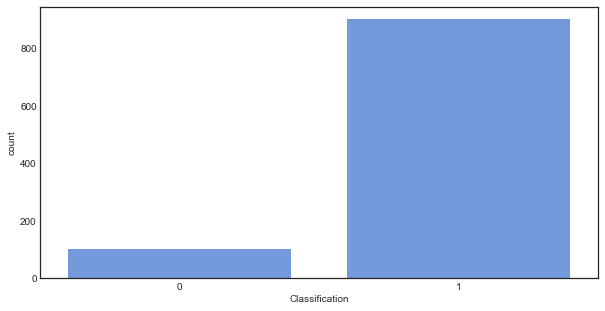

In [6]:
sns.countplot(df['Classification'], color='cornflowerblue');

---
# 5. Feature Importance

In [7]:
y = df['Classification']
x = df.drop('Classification', axis=1)

In [8]:
rforest = RandomForestClassifier(random_state = 42)
rforest.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

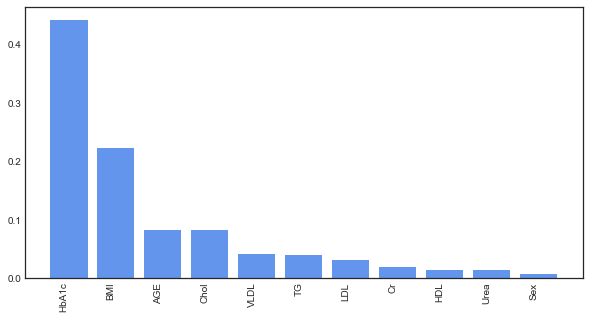

In [9]:
fimportance = rforest.feature_importances_
rf = pd.DataFrame([x.columns,fimportance]).transpose()
rf.columns = ['variable','importance']
rf = rf.sort_values(by='importance', ascending=False)
plt.bar(rf['variable'],rf['importance'],color='cornflowerblue')
plt.xticks(rotation=90, ha='right')
plt.show()

---
# 6. export dataset

In [10]:
df.to_csv('clean.csv', index=False)
df.shape

(1000, 12)